<h1>Heart Attack Risk Analysis and Prediction</h1>

This project involves analyzing an AI-generated dataset designed to mimic real-world heart attack risk factors. The dataset consists of 26 columns and 8,763 entries, containing various health-related attributes listed below:

- Patient ID --- Unique identifier for each patient
- Age --- Age of the patient
- Sex --- Gender of the patient (Male/Female)
- Cholesterol --- Cholesterol levels of the patient
- Blood Pressure --- Blood pressure of the patient (systolic/diastolic)
- Heart Rate --- Heart rate of the patient
- Diabetes --- Whether the patient has diabetes (Yes/No)
- Family History --- Family history of heart-related problems (1: Yes, 0: No)
- Smoking --- Smoking status of the patient (1: Smoker, 0: Non-smoker)
- Obesity --- Obesity status of the patient (1: Obese, 0: Not obese)
- Alcohol Consumption --- Level of alcohol consumption by the patient (1: Yes, 0: No)
- Exercise Hours Per Week --- Number of exercise hours per week
- Diet --- Dietary habits of the patient (Healthy/Average/Unhealthy)
- Previous Heart Problems --- Previous heart problems of the patient (1: Yes, 0: No)
- Medication Use --- Medication usage by the patient (1: Yes, 0: No)
- Stress Level --- Stress level reported by the patient (1-10)
- Sedentary Hours Per Day --- Hours of sedentary activity per day
- Income --- Yearly income level of the patient (in USD)
- BMI --- Body Mass Index (BMI) of the patient
- Triglycerides --- Triglyceride levels of the patient
- Physical Activity Days Per Week --- Days of physical activity per week
- Sleep Hours Per Day --- Hours of sleep per day
- Country --- Country of the patient
- Continent --- Continent where the patient resides
- Hemisphere --- Hemisphere where the patient resides
- Heart Attack Risk --- Presence of heart attack risk (1: Yes, 0: No)

The goal of this project is to extract meaningful insights from the data through exploratory data analysis (EDA) and statistical methods. Additionally, a machine learning model will be developed to predict the probability of a person experiencing a heart attack based on their features. Various evaluation metrics will be used to assess the model’s performance, ensuring it provides accurate and reliable predictions.

<h2>Importing libraries</h2>

<h3>1) Importing and analyzing the dataset</h3>

In this section, we begin by importing the necessary libraries required for data analysis, visualization, preprocessing, and modeling. These include standard Python libraries such as NumPy, Pandas, Matplotlib, and Seaborn, along with machine learning tools from scikit-learn and imbalanced-learn.

After importing the libraries, we load the heart attack risk dataset and display the first five rows to better understand the structure and features of the data.

In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPClassifier

In [194]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Now that we have imported the dataset, the next step is to explore the data to develop a general understanding of its structure and contents.

We will perform the following basic operations:

- .shape — to view the number of rows and columns (i.e., the size of the dataset)
- .columns — to ensure all the expected features are present and properly labeled
- .describe() — to generate a statistical summary of the dataset, showing measures like mean, standard deviation, minimum, maximum, and percentiles for each numerical feature

In [195]:
print('SHAPE:', df.shape)
print('\nCOLUMNS:\n  ', df.columns)
print('\nSUMMARY:\n', df.describe())

SHAPE: (8763, 26)

COLUMNS:
   Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

SUMMARY:
                Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   


<h2>2) Data Preprocessing</h2>

Missing or null values can negatively impact model performance and analysis results.<br>
Therefore, we will check whether any such values exist and we will handle them appropriately:

In [196]:
print(df.isnull().sum())

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


Although our results show no missing values in the dataset, it is considered good coding practice to explicitly drop any null values that might have been overlooked or could appear after future transformations.

Thus, we perform a dropna() operation as a safety measure:

In [197]:
df = df.dropna()
df.shape

(8763, 26)

In order to better organize and access the data, we aim to set the 'Patient ID' column as the primary key of our dataset. However, before doing so, it is important to verify that 'Patient ID' meets the two main requirements of a primary key:

- It must contain only unique values (no duplicates).
- No values should be missing (already confirmed earlier).

Therefore, we will check whether the 'Patient ID' column fulfills these conditions:

In [198]:
if(df['Patient ID'].unique().shape[0] == df.shape[0]):
    df = df.set_index('Patient ID')
    print('Patient ID set as primary key!')
else:
    print('Could not set Patient ID as primary key.')

Patient ID set as primary key!


In our dataset, the 'Blood Pressure' column contains both Systolic and Diastolic values, separated by a forward slash ("/").<br>
For better usability and analysis, we will split this combined column into two separate columns: "Systolic" and "Diastolic".

In [199]:
bp_index = df.columns.get_loc("Blood Pressure")
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df.drop(columns=['Blood Pressure'], inplace=True)

<h2>3) Data Visualization</h2>

Before diving into the calculations and model building, we need to categorize our dataset into two different categories - Clinical vs. Demographic features. The clinical features contain primarily numerical features which relate to the medical history of the patient, while the demographic features contain mostly categorical features which relate to the external environment of the individual.

These are used to better contextualize and explain our results. As such, we define our feature sets as follows:

In [200]:
clinical_factors = [ 'Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 
                    'Alcohol Consumption', 'Diet', 'Previous Heart Problems', 'Medication Use' ]

demographic_factors = [ 'Stress Level', 'Physical Activity Days Per Week',
                       'Sleep Hours Per Day', 'Continent', 'Hemisphere' ]

We will now investigate the distribution of individuals who pose a heart attack risk compared to those who don't. This analysis helps us understand the class imbalance in the dataset, which is important for model training.

For this, we will use a bar plot to visualize the counts of individuals in each risk category.

In [201]:
# Function to display counts to bar plots
def AddCountsToGraph(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center", va="bottom")

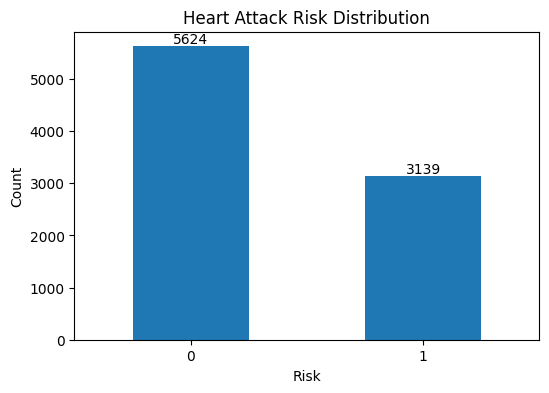

In [202]:
ax1 = df['Heart Attack Risk'].value_counts().plot(kind='bar', figsize=(6, 4))
plt.title('Heart Attack Risk Distribution')
plt.xlabel('Risk')
plt.ylabel('Count')
plt.xticks(rotation=0)
AddCountsToGraph(ax1)
plt.show()

<h3>3.1 - Correlation of features</h3>

We need to investigate whether two or more features are correlated to filter such values and cater to feature dependencies. 

To investigate the relationships between pairs of features, we will set up a correlation matrix to measure the strength of these relationships. A correlation heatmap will be used to visually represent this correlation, where we can easily identify which features are strongly correlated.

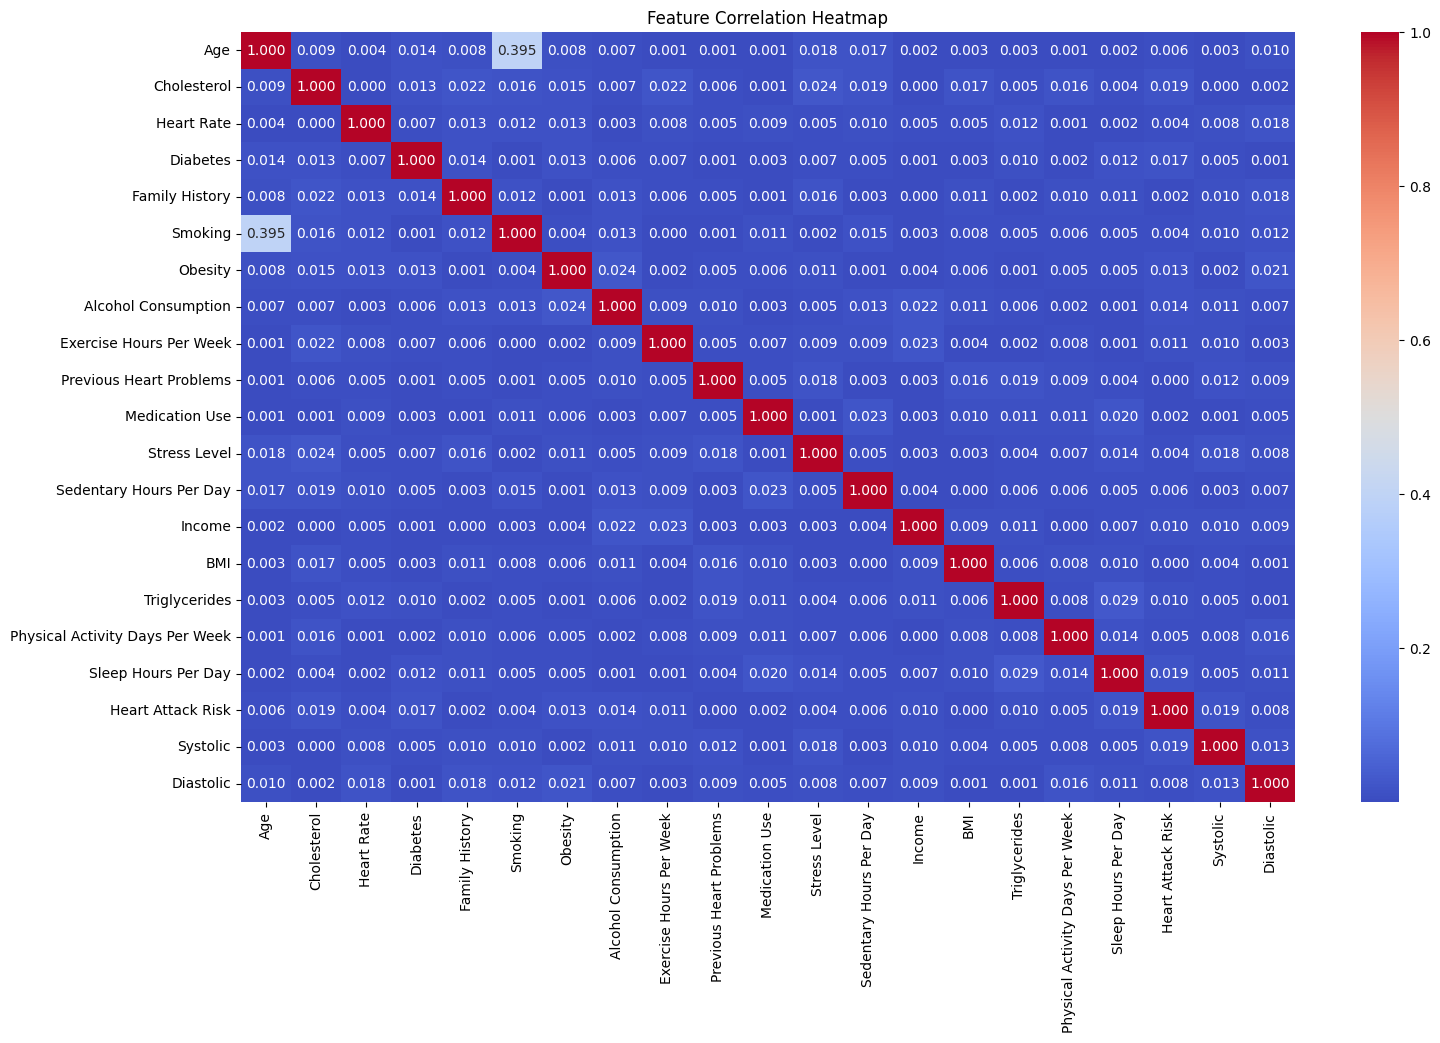

In [203]:
corr_matrix = df.corr(numeric_only=True).abs()

plt.figure(figsize=(17, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.3f')
plt.title('Feature Correlation Heatmap')
plt.show()

Based on the above graph, we can see that almost no feature is strongly correlated with each other (>0.85).

However, to investigate other key features which might contribute to heart attack risk, we will only see the top 5 highly correlated features:

In [204]:
# Filtering only the upper triangle of correlation matrix
upper_triangle = corr_matrix.mask(np.tril(np.ones(corr_matrix.shape)).astype(bool))

high_correlation_features = []
while len(high_correlation_features) < 5:
    heart_attack_corr = upper_triangle['Heart Attack Risk']
    
    # Obtaining values and features with max correlation
    max_corr_value = heart_attack_corr.max()
    max_corr_feature = heart_attack_corr.idxmax()

    # Dropping max features to ensure uniqueness
    high_correlation_features.append(max_corr_feature)
    upper_triangle = upper_triangle.drop(max_corr_feature, axis=1)
    upper_triangle = upper_triangle.drop(max_corr_feature, axis=0)

print("Top 5 Highly Correlated Features with Heart Attack Risk:\n", high_correlation_features)

Top 5 Highly Correlated Features with Heart Attack Risk:
 ['Cholesterol', 'Sleep Hours Per Day', 'Diabetes', 'Alcohol Consumption', 'Obesity']


Having identified the most significant contributors to heart attack risk, we will now create a pairplot to visualize how these features interact with each other and how they contribute to Heart Attack Risk. The pairplot will help us understand the relationships between these features and their influence on the target variable.

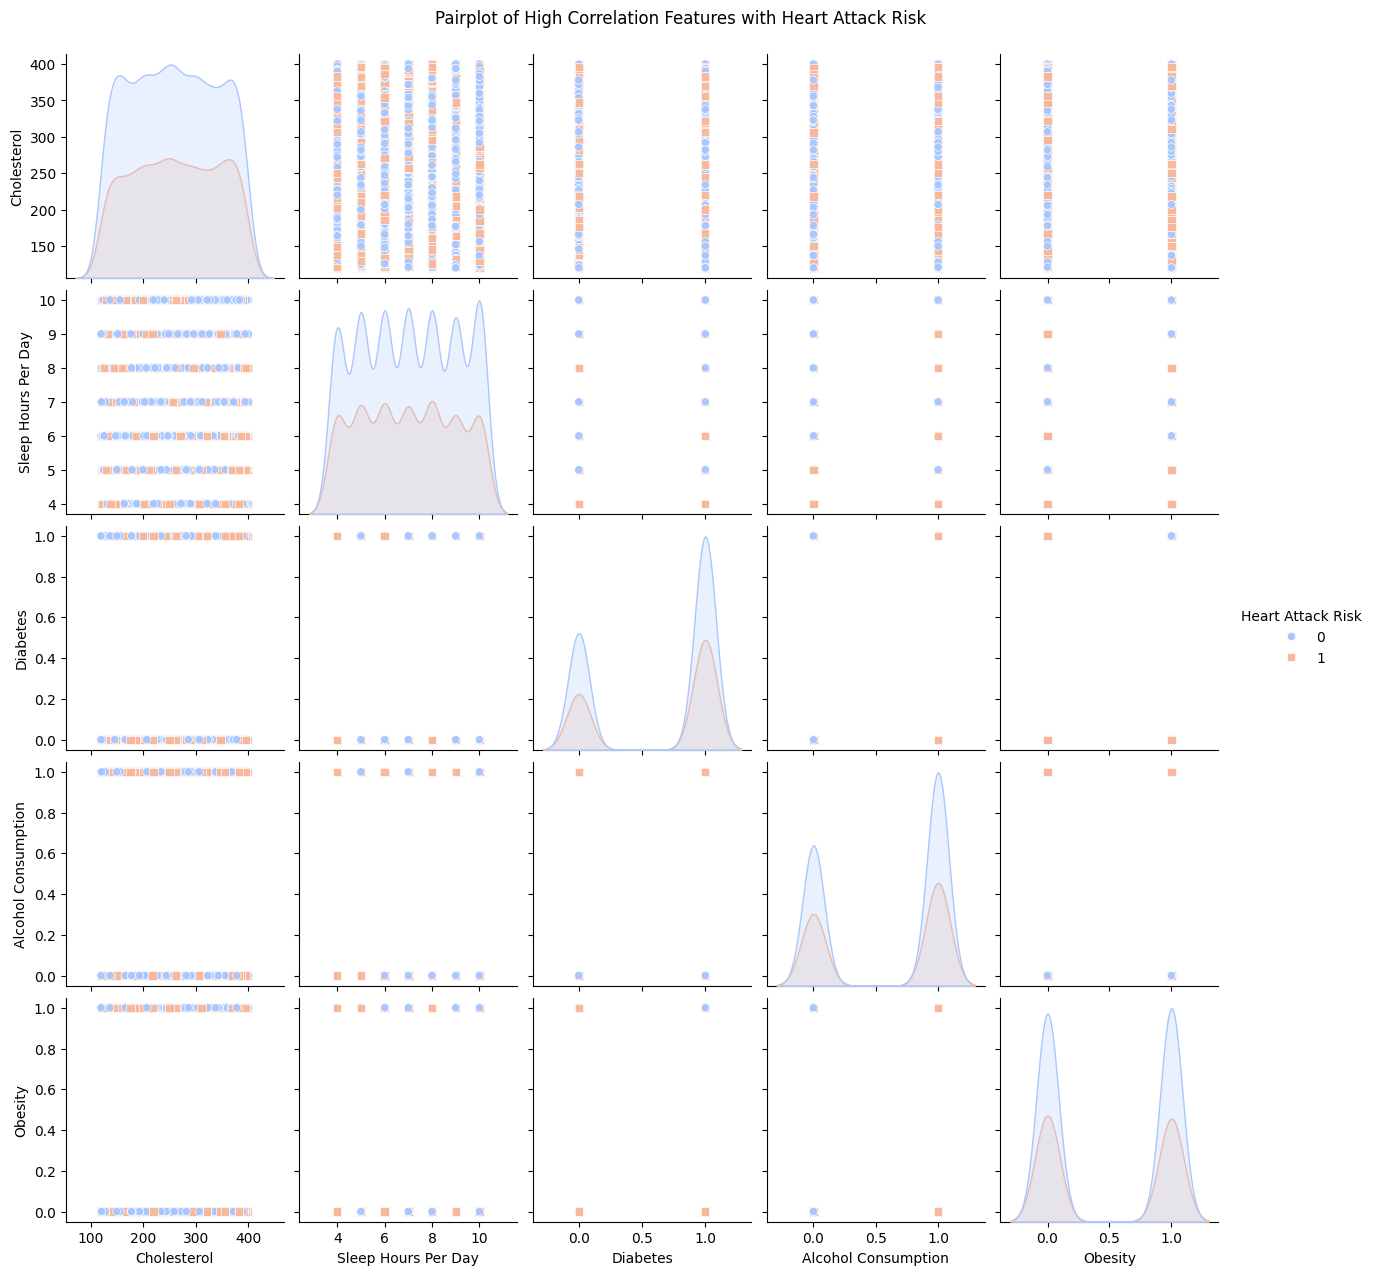

In [205]:
df_high_corr = df[high_correlation_features + ['Heart Attack Risk']]
sns.pairplot(df_high_corr, hue='Heart Attack Risk', palette='coolwarm', markers=["o", "s"])
plt.suptitle('Pairplot of High Correlation Features with Heart Attack Risk', y=1.02)
plt.show()

Based on the pairplots and previous findings, we can observe that certain features like Alcohol Consumption and Diabetes, as well as Alcohol Consumption and Obesity, show a certain trend with each other. However, Smoking was found to be the only feature that showed a linear correlation with heart attack risk. To explore other possible relationships, we will now analyze non-linear correlations.

We will calculate the correlation coefficients for all numerical features with Heart Attack Risk and visualize the results. This will help us see if any features exhibit non-linear correlations that could be of importance.

C:\Users\Codew\AppData\Local\Temp\ipykernel_1400\1474243321.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation with Heart Attack Risk', y='Feature', data=corr_df, palette='coolwarm')


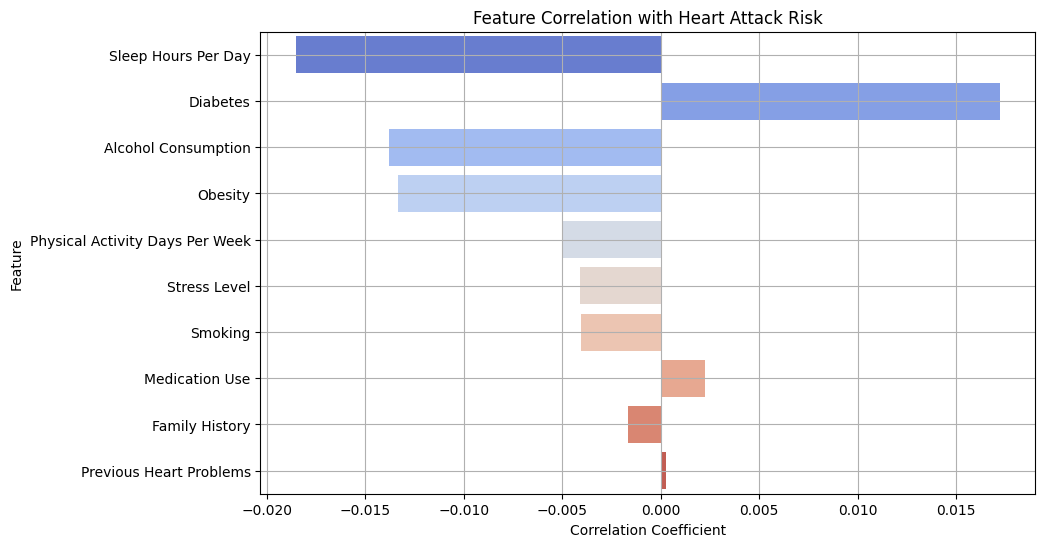

In [206]:
correlations = {}
all_factors = clinical_factors + demographic_factors

for feature in all_factors:
    if df[feature].dtype in ['float64', 'int64']:               # Specifying 'int' type
        corr = np.corrcoef(df[feature], df['Heart Attack Risk'])[0, 1]
        correlations[feature] = corr

# Converting to dataframe and sorting by absolute values in descending order
corr_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation with Heart Attack Risk'])
corr_df['Abs Correlation'] = corr_df['Correlation with Heart Attack Risk'].abs()
corr_df = corr_df.sort_values('Abs Correlation', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation with Heart Attack Risk', y='Feature', data=corr_df, palette='coolwarm')
plt.title('Feature Correlation with Heart Attack Risk')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

Seeing that there is some difference in the number of individuals having heart attack against those who do not, we will check for class imbalances in any other feature as well. Here, we will make comparisons between multiple types of features as mentioned below:

<h3>3.2 Clinical vs Demographic factors</h3>

<h4>3.2.1 - Clinical factors<h4>

In this section, we will investigate the distribution of clinical factors with respect to Heart Attack Risk. For this, we will use a countplot for categorical values to visualize how clinical factors (such as Sex, Diabetes, Smoking, etc.) relate to the likelihood of heart attack risk.

We will plot the frequency of each clinical factor within the Heart Attack Risk classes (positive and negative) across different subplots.

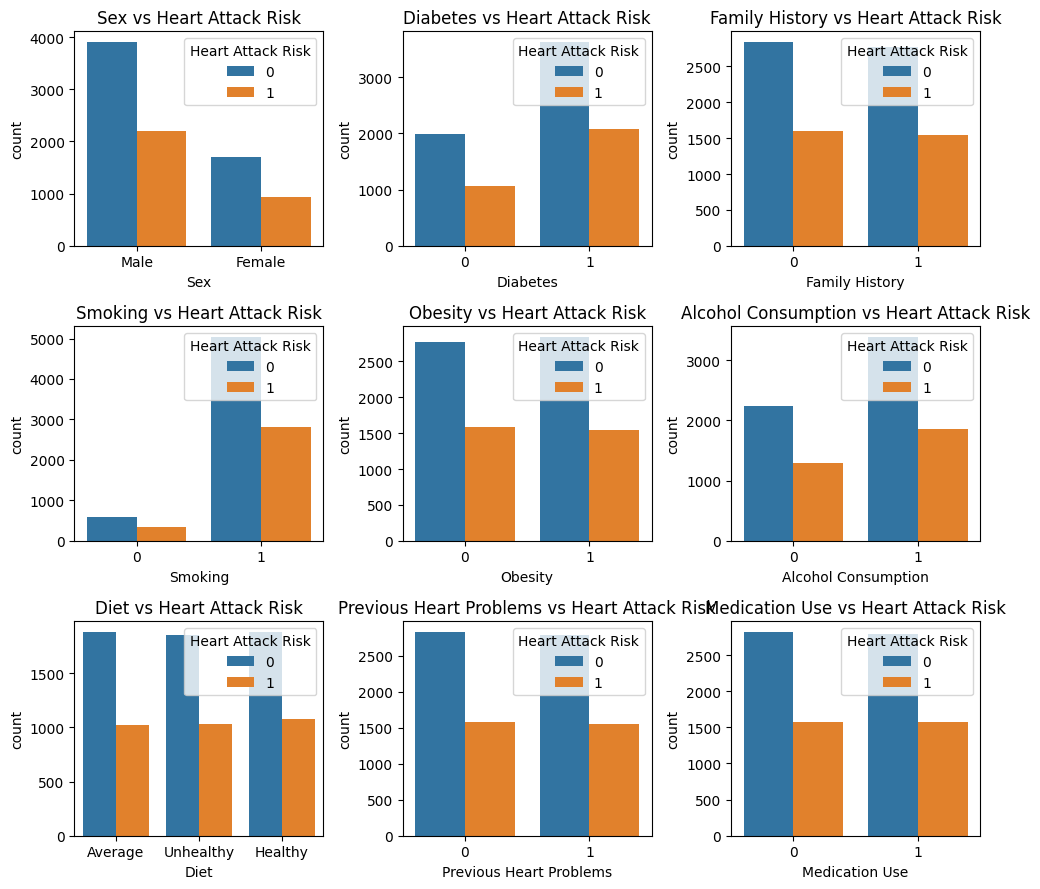

In [207]:
# Initializing parameters for subplots
n_cols = 3
n_rows = (len(clinical_factors) // n_cols) + (len(clinical_factors) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3 * n_rows))
axes = axes.flatten()

for idx, feature in enumerate(clinical_factors):
    sns.countplot(x=feature, hue='Heart Attack Risk', data=df, ax=axes[idx])
    axes[idx].set_title(f'{feature} vs Heart Attack Risk')

# For number of graphs % n_col != 0 
for idx in range(len(clinical_factors), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

<h4>3.2.2 - Demographic factors</h4>

Investigating the relationship between demographic factors (such as Stress Level, Continent, Hemisphere, etc.) and Heart Attack Risk, we will use histograms with KDE (Kernel Density Estimation) to visualize the distribution of these demographic factors across different Heart Attack Risk classes.

We will visualize the demographic features against the Heart Attack Risk class using multiple subplots arranged in a grid.

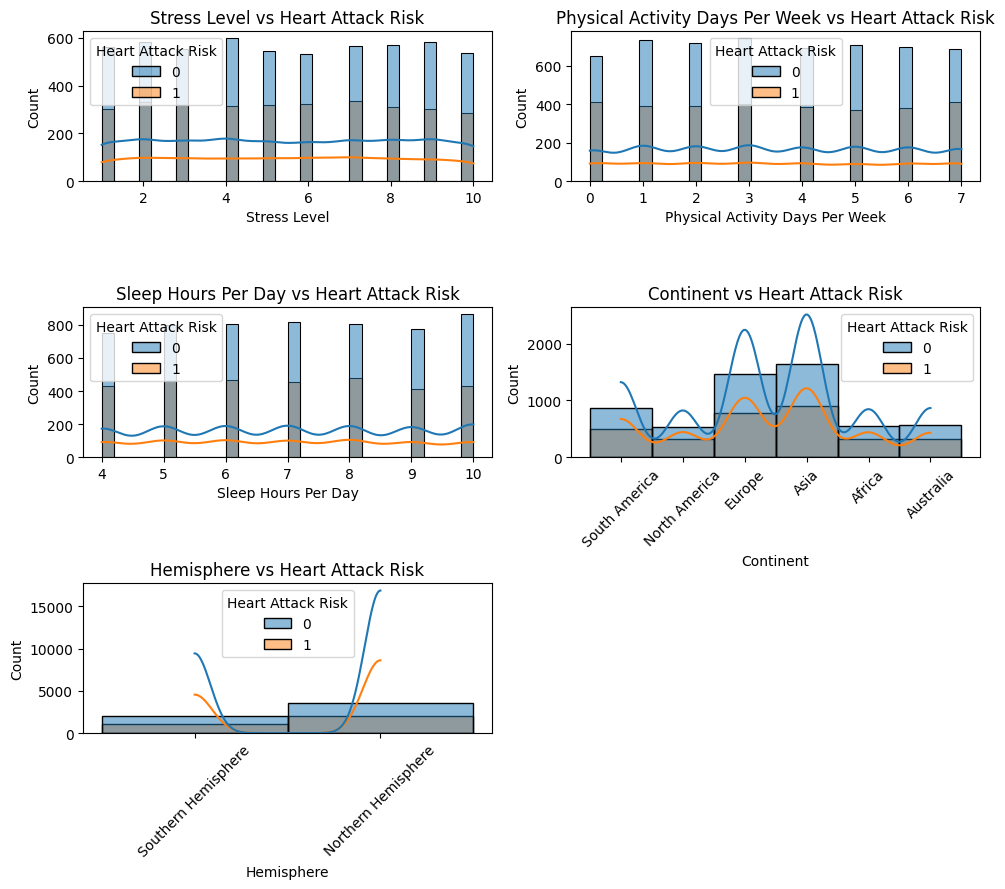

In [208]:
n_cols = 2
n_rows = (len(demographic_factors) // n_cols) + (len(demographic_factors) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3 * n_rows))
axes = axes.flatten()

for idx, feature in enumerate(demographic_factors):
    sns.histplot(x=feature, hue='Heart Attack Risk', data=df, ax=axes[idx], kde=True, bins=30)
    axes[idx].set_title(f'{feature} vs Heart Attack Risk')
    if(feature == 'Continent' or feature == 'Hemisphere'):
        axes[idx].tick_params(axis='x', rotation=45)


for idx in range(len(demographic_factors), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

<h2>4) Model Prediction</h2>
<h3>4.1 - Making Scaler Class</h3>

To ensure that our features are properly scaled for model training, we will implement a custom Scaler Class. This class will handle the normalization of data by calculating the mean and standard deviation for each feature, and then standardizing the dataset accordingly.

In [209]:
class ScalerClass:
    def __init__(self):
        self.mean = {}
        self.sd = {}
    
    def fit(self, data):
        data = data.to_numpy(dtype=float)
        for i in range(data.shape[1]):
            self.mean[i] = np.mean(data[:, i])
            self.sd[i] = np.std(data[:, i])
    
    def transform(self, data):
        data = data.to_numpy()
        standardized_data = data
        for i in range(data.shape[1]):
            standardized_data[:, i] = (data[:, i] - self.mean[i]) / self.sd[i]
        
        return standardized_data

<h3>4.2 - Making a Machine Learning Models</h3>

The LinearRegressionClass implements a basic linear regression model from scratch. It includes methods for fitting the model to training data, predicting values based on test data, and evaluating model accuracy. 

Similarly, the LogisticRegressionClass implements a logistic regression model, incluing various methods for evaluation, and the myNN class works the same way.

In [210]:
class LinearRegressionClass:
    def __init__(self, lr, size):
        self.weights = 0
        self.bias = 0
        self.learning_rate = lr
        self.no_of_iterations = size
        self.scalerizer = ScalerClass()

    def fit(self, train_data, train_label):
        self.scalerizer.fit(train_data)
        final_data = self.scalerizer.transform(train_data)

        loss_values = []
        m, n = final_data.shape
        self.weights = np.zeros(n)

        for _ in range(self.no_of_iterations):
            # Setting up loss equation
            predictions = self.bias + np.dot(final_data, self.weights)
            error = predictions - train_label

            # Calculating derivative
            dw = np.dot(final_data.T, error) / m
            db = np.sum(error) / m

            # Updating parameters
            self.weights = self.weights - (self.learning_rate * dw)
            self.bias = self.bias - (self.learning_rate * db)

            loss_i = np.mean(error ** 2) / 2
            loss_values.append(loss_i)

        return loss_values


    def predict(self, test_data):
        test_data_stdized = self.scalerizer.transform(test_data)
        predicted_labels = self.bias + np.dot(test_data_stdized, self.weights)
        return predicted_labels.tolist()

    # Calculating accuracy
    def score(self, test_data, test_labels):
        return np.mean(self.predict(test_data) == test_labels)

In [211]:
class LogisticRegressionClass:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    # Setting up sigmoid activation function
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros((n, 1))
        self.bias = 0
        self.loss_values = []

        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            a = self.sigmoid(z)

            dz = a - y
            dw = np.dot(X.T, dz) / m
            db = np.sum(dz) / m

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            loss = -np.mean(y * np.log(a) + (1 - y) * np.log(1 - a))
            self.loss_values.append(loss)
        
        return self.loss_values

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)
    
    def predict(self, X):
        y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
        return (y_pred >= 0.5).astype(int).flatten()

    def score(self, X, y):
        return np.mean(self.predict(X) == y)

In [212]:
class MyNN:
    def __init__(self, input_size, hidden_size=16, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, 1) * 0.01
        self.b2 = np.zeros((1, 1))

    def relu(self, Z):
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        return (Z > 0).astype(float)

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def fit(self, X, y):
        m = X.shape[0]
        for _ in range(self.epochs):
            Z1 = np.dot(X, self.W1) + self.b1
            A1 = self.relu(Z1)
            Z2 = np.dot(A1, self.W2) + self.b2
            A2 = self.sigmoid(Z2)

            dZ2 = A2 - y
            dW2 = np.dot(A1.T, dZ2) / m
            db2 = np.sum(dZ2) / m
            dA1 = np.dot(dZ2, self.W2.T)
            dZ1 = dA1 * self.relu_derivative(Z1)
            dW1 = np.dot(X.T, dZ1) / m
            db1 = np.sum(dZ1, axis=0, keepdims=True) / m
            
            self.W1 -= self.learning_rate * dW1
            self.b1 -= self.learning_rate * db1
            self.W2 -= self.learning_rate * dW2
            self.b2 -= self.learning_rate * db2

    def predict_proba(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = self.relu(Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        return self.sigmoid(Z2)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

    def score(self, X, y):
        return np.mean(self.predict(X) == y)

<h3>4.3 - Creating train-test split, and using SMOTE for class imbalances</h3>

In this section, we will:

- Split the data into training and testing sets using the train_test_split method.
- Apply SMOTE (Synthetic Minority Over-sampling Technique) to handle class imbalances in the dataset. SMOTE generates synthetic samples for the minority class to balance the distribution of the classes.

In [213]:
y = df['Heart Attack Risk']
X = df.drop('Heart Attack Risk', axis=1)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)
train_X_numeric = train_X.select_dtypes(include=[np.number])
test_X_numeric = test_X.select_dtypes(include=[np.number])

# Applying smote to dataset to handle class imbalances
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(train_X_numeric, train_y)
X_test_smote, y_test_smote = smote.fit_resample(test_X_numeric, test_y)

<h3>4.4 - Training and testing on dataset</h3>

In [214]:
# Linear regression
linear_regression = LinearRegressionClass(0.01, 1000)
loss_linear = linear_regression.fit(X_train_smote, y_train_smote)
predictions_linear = linear_regression.predict(X_test_smote)

# Logistic regression
logreg = LogisticRegressionClass()
loss_logistic = logreg.fit(np.array(X_train_smote, dtype=float), np.array(y_train_smote).reshape(-1, 1))
prediction_logistic = logreg.predict(np.array(X_test_smote, dtype=float))

# Neural network
nn_model = MyNN(len(X_train_smote.columns))
nn_model.fit(np.array(X_train_smote, dtype=float), np.array(y_train_smote).reshape(-1, 1))
prediction_nn = nn_model.predict(np.array(X_test_smote, dtype=float))

C:\Users\Codew\AppData\Local\Temp\ipykernel_1400\2793266010.py:27: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(a) + (1 - y) * np.log(1 - a))
C:\Users\Codew\AppData\Local\Temp\ipykernel_1400\2793266010.py:27: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(a) + (1 - y) * np.log(1 - a))
C:\Users\Codew\AppData\Local\Temp\ipykernel_1400\2793266010.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


<h3>4.5 - Evaluating model</h3>

In order to investigate the accuracy of our model, we will use the help of methods such as displaying best accuracy and best threshold, as shown below:

In [215]:
# Scanning multiple values for best threshold value
y_pred_continuous = np.array(predictions_linear)

best_threshold = 0
best_accuracy = 0
thresholds = [i / 100 for i in range(0, 101)]

for t in thresholds:
    y_pred_linreg = (y_pred_continuous >= t).astype(int)
    acc = accuracy_score(y_test_smote, y_pred_linreg)
    if acc > best_accuracy:
        best_accuracy = acc
        best_threshold = t

print('LINEAR REGRESSION:')
print(f"    Best Threshold: {best_threshold}")
print(f"    Best Accuracy: {best_accuracy}")

y_pred_linreg = (y_pred_continuous >= best_threshold).astype(int)

LINEAR REGRESSION:
    Best Threshold: 0.57
    Best Accuracy: 0.6141342756183745


In [216]:
y_pred_continuous2 = np.array(prediction_logistic)

best_threshold = 0
best_accuracy = 0

thresholds = [i / 100 for i in range(0, 101)]

for t in thresholds:
    y_pred_logreg = (y_pred_continuous2 >= t).astype(int)
    acc = accuracy_score(y_test_smote, y_pred_logreg)
    if acc > best_accuracy:
        best_accuracy = acc
        best_threshold = t

print('LOGISTIC REGRESSION:')
print(f"    Best Threshold: {best_threshold}")
print(f"    Best Accuracy: {best_accuracy}")

y_pred_logreg = (y_pred_continuous2 >= best_threshold).astype(int)

LOGISTIC REGRESSION:
    Best Threshold: 0.0
    Best Accuracy: 0.5


In [222]:
y_pred_continuous3 = np.array(prediction_nn)

best_threshold = 0
best_accuracy = 0

thresholds = [i / 100 for i in range(0, 101)]

for t in thresholds:
    y_pred_nn = (y_pred_continuous3 >= t).astype(int)
    acc = accuracy_score(y_test_smote, y_pred_nn)
    if acc > best_accuracy:
        best_accuracy = acc
        best_threshold = t

print('NEURAL NETWORK:')
print(f"    Best Threshold: {best_threshold}")
print(f"    Best Accuracy: {best_accuracy}")

y_pred_nn = (y_pred_continuous3 >= best_threshold).astype(int)

NEURAL NETWORK:
    Best Threshold: 0.0
    Best Accuracy: 0.5


Below are the details for our models giving classification report and providing us with a heatmap to visualize our data:

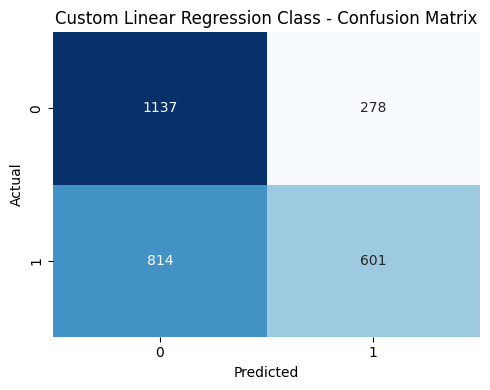

Custom Linear Regression Class - Evaluation Metrics
Precision: 0.6837315130830489
Recall: 0.42473498233215545
F1 Score: 0.5239755884917175

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.80      0.68      1415
           1       0.68      0.42      0.52      1415

    accuracy                           0.61      2830
   macro avg       0.63      0.61      0.60      2830
weighted avg       0.63      0.61      0.60      2830



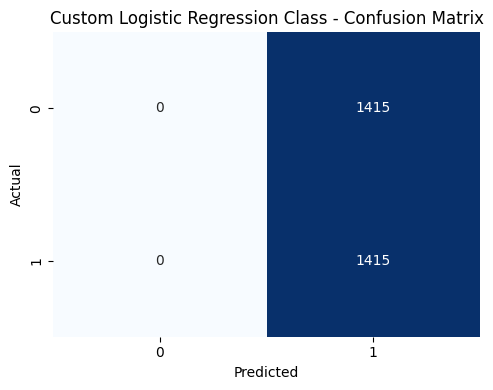

Custom Logistic Regression Class - Evaluation Metrics
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1415
           1       0.50      1.00      0.67      1415

    accuracy                           0.50      2830
   macro avg       0.25      0.50      0.33      2830
weighted avg       0.25      0.50      0.33      2830



c:\Users\Codew\anaconda3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Codew\anaconda3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Codew\anaconda3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


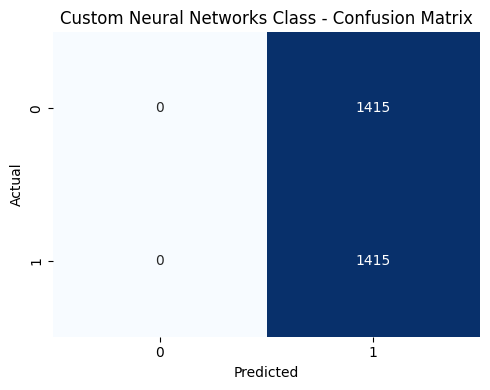

Custom Neural Networks Class - Evaluation Metrics
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1415
           1       0.50      1.00      0.67      1415

    accuracy                           0.50      2830
   macro avg       0.25      0.50      0.33      2830
weighted avg       0.25      0.50      0.33      2830



c:\Users\Codew\anaconda3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Codew\anaconda3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Codew\anaconda3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [223]:
def evaluate_model(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    print(f"{model_name} - Evaluation Metrics")
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


evaluate_model(y_test_smote, y_pred_linreg, "Custom Linear Regression Class")
evaluate_model(y_test_smote, y_pred_logreg, "Custom Logistic Regression Class")
evaluate_model(y_test_smote, y_pred_nn, "Custom Neural Networks Class")

<h3>4.6 - Comparison with Scikit-learn's findings</h3>

In this section, we compare the results of our custom Linear Regression model with Scikit-learn's LinearRegression model. We follow the same procedure of training, predicting, and evaluating both models. 

We will:

- Train with Scikit-learn: We train the Linear Regression model from Scikit-learn using the resampled training data (X_train_smote and y_train_smote).
- Make Predictions: We use the trained model to make predictions on the resampled test data (X_test_smote).
- Optimize Threshold: Similar to our custom model, we experiment with different thresholds (from 0.00 to 1.00) to maximize the accuracy.
- Evaluate: We evaluate the performance of Scikit-learn's model using the same evaluation metrics (Confusion Matrix, Precision, Recall, F1 Score, and Classification Report).

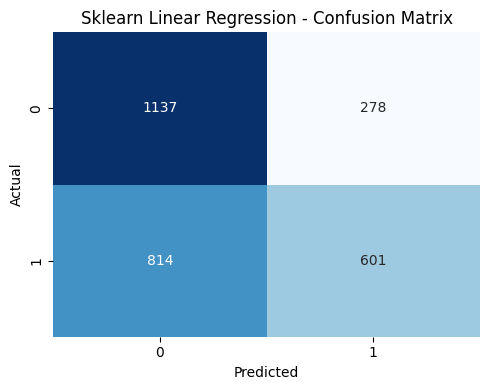

Sklearn Linear Regression - Evaluation Metrics
Precision: 0.6837315130830489
Recall: 0.42473498233215545
F1 Score: 0.5239755884917175

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.80      0.68      1415
           1       0.68      0.42      0.52      1415

    accuracy                           0.61      2830
   macro avg       0.63      0.61      0.60      2830
weighted avg       0.63      0.61      0.60      2830

Best Threshold: 0.57
Best Accuracy: 0.6141342756183745


In [224]:
linear_sklearn = LinearRegression()
linear_sklearn.fit(X_train_smote, y_train_smote)

y_pred_continuous_sk = np.array(linear_sklearn.predict(X_test_smote))

best_threshold = 0
best_accuracy = 0
thresholds = [i / 100 for i in range(0, 101)]

for t in thresholds:
    y_pred_linreg_sk = (y_pred_continuous_sk >= t).astype(int)
    acc = accuracy_score(y_test_smote, y_pred_linreg_sk)
    if acc > best_accuracy:
        best_accuracy = acc
        best_threshold = t

y_pred_linreg_sk = (y_pred_continuous_sk >= best_threshold).astype(int)

evaluate_model(y_test_smote, y_pred_linreg_sk, "Sklearn Linear Regression")
print(f"Best Threshold: {best_threshold}")
print(f"Best Accuracy: {best_accuracy}")

Best Threshold: 0.01
Best Accuracy: 0.5063604240282685


c:\Users\Codew\anaconda3.12\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


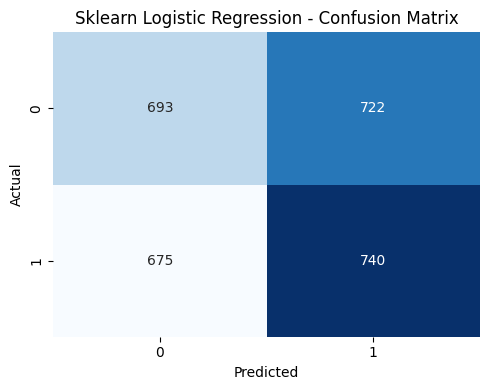

Sklearn Logistic Regression - Evaluation Metrics
Precision: 0.506155950752394
Recall: 0.5229681978798587
F1 Score: 0.5144247480013904

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.49      0.50      1415
           1       0.51      0.52      0.51      1415

    accuracy                           0.51      2830
   macro avg       0.51      0.51      0.51      2830
weighted avg       0.51      0.51      0.51      2830



In [225]:
logistic_sklearn = LogisticRegression(class_weight='balanced')
logistic_sklearn.fit(X_train_smote, y_train_smote)

y_pred_continuous_sk = np.array(logistic_sklearn.predict(X_test_smote))

best_threshold = 0
best_accuracy = 0
thresholds = [i / 100 for i in range(0, 101)]

for t in thresholds:
    y_pred_logreg_sk = (y_pred_continuous_sk >= t).astype(int)
    acc = accuracy_score(y_test_smote, y_pred_logreg_sk)
    if acc > best_accuracy:
        best_accuracy = acc
        best_threshold = t

print(f"Best Threshold: {best_threshold}")
print(f"Best Accuracy: {best_accuracy}")

y_pred_logreg_sk = (y_pred_continuous_sk >= best_threshold).astype(int)
evaluate_model(y_test_smote, y_pred_logreg_sk, "Sklearn Logistic Regression")

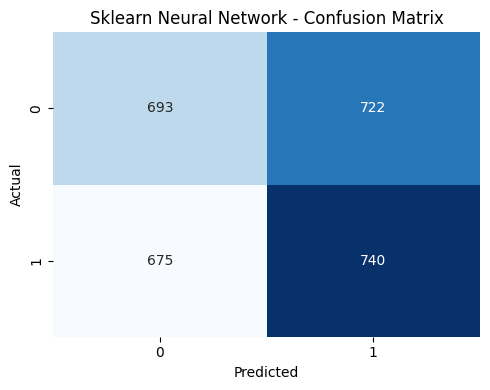

Sklearn Neural Network - Evaluation Metrics
Precision: 0.506155950752394
Recall: 0.5229681978798587
F1 Score: 0.5144247480013904

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.49      0.50      1415
           1       0.51      0.52      0.51      1415

    accuracy                           0.51      2830
   macro avg       0.51      0.51      0.51      2830
weighted avg       0.51      0.51      0.51      2830



In [ ]:
nn_sk = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=42)
nn_sk.fit(X_train_smote, y_train_smote)
y_pred_nn_sk = nn_sk.predict(X_test_smote)

evaluate_model(y_test_smote, y_pred_logreg_sk, "Sklearn Neural Network")

<h2>5) Conclusion</h2>

### Findings from the Dataset:
Based on the findings in the dataset, we analyzed a significant imbalance in multiple features, including in the number of individuals at risk of a heart attack.  We observed very slight and minimal linear feature dependence, especially in Smoking, and non-linear dependence in other features like Alcohol Consumption and Obesity.

One key point to note are the evaluations of our Logistic Regression and Neural Network Models showing class imbalances over Sklearn's Logistic Regression and Neural Network models. It is important to highlight that these imbalances persisted despite applying various other methods, some of them being mentioned below:

- Applying SMOTE
- Threshold Tuning
- Implementing Class Weights
- Probabilistic Output & Threshold Tuning

Despite these efforts, the class imbalance in our Logistic Regression and Neural Network models persisted, primarily due to the simplicity of these models and their inability to map over linear structures.

Other than that, to answer our main questions:<br><br>

<b>Q1. Can machine learning models accurately classify heart attack risk based on health indicators?</b>

Ans. Our Linear Regression model yielded an accuracy of upto 64% while our Logistic Regression model yielded up to 51% accuracy. While these individially may not seem good enough to predict Heart Attack Risk, we also need to consider the various flaws of the dataset. Upon comparing with sklearn's models, our models yielded the same accuracy, making them fairly accurate predictors of Heart Attack Risk.<br><br>

<b>Q2. What factors contribute most to heart attack risk?</b>

Ans. As mentioned above, our findings show that Smoking is the biggest contributor to Heart Attack Risk, but other factors may interplay to produce devastating results (Alcohol Consumption with Obesity, and Alcohol Consumption with Diabetes).<br><br>

<b>Q3. Can healthy practices (e.g. exercise, diet) overshadow unhealthy practices to prevent heart attack?</b>

Ans. Our correlation matrix shows that the columns for healthy factors barely reach 0.01, as opposed to unhealthy factors which, at regular intervals, exceed 0.01. As such, it can be said that healthy factors do indeed overshadow unhealthy practices.<br><br>

<b>Q4. How do socioeconomic and demographic factors influence heart attack risk compared to clinical factors?</b>

Ans. Despite demographic stressors (income, stress levels etc.) being important factors, they do not show a valid correlation to heart attack risk and do not pose as much of a risk than do clinical factors. This signifies at the importance of leading a healthy physical life to minimize Heart Attack Risk.<br><br>


In conclusion, our approach provided meaningful insights into the factors contributing to heart attack risk, and the models developed offer a reliable foundation for predicting heart attack risk based on key health and lifestyle features. The comparison with Scikit-learn also highlighted areas for improvement in our custom model, guiding future enhancements.